<a href="https://colab.research.google.com/github/bashwat9902/-task6_sales_trend.sql/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("/content/Synthetic_HR_Attrition_Dataset.csv")
print("Top 5 rows of the dataset:")
print(df.head())
print("\nData Info:")
print(df.info())

Top 5 rows of the dataset:
   EmployeeID  Age  Gender              Department             JobRole  \
0           1   50  Female                   Sales  Research Scientist   
1           2   36  Female  Research & Development     Sales Executive   
2           3   29    Male  Research & Development     Human Resources   
3           4   42    Male  Research & Development  Research Scientist   
4           5   40    Male         Human Resources  Research Scientist   

   MonthlyIncome  JobSatisfaction  EnvironmentSatisfaction  YearsAtCompany  \
0          18563                1                        2               5   
1           6568                2                        1               4   
2          12847                2                        1               7   
3          17135                1                        3               1   
4           4742                2                        4              15   

   YearsSinceLastPromotion OverTime Attrition  
0          

In [3]:
print("\nAttrition Value Counts:")
print(df['Attrition'].value_counts())


Attrition Value Counts:
Attrition
No     402
Yes     98
Name: count, dtype: int64


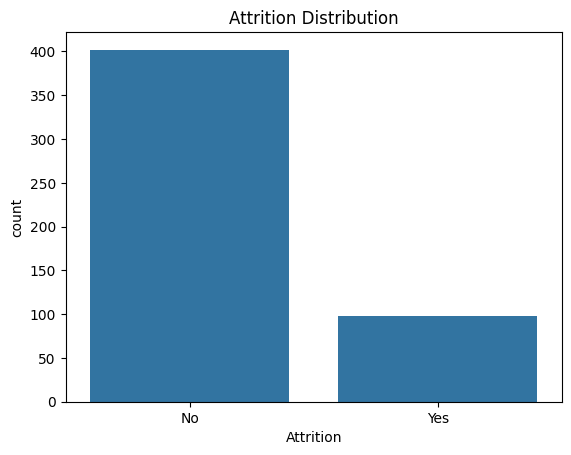

In [4]:
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

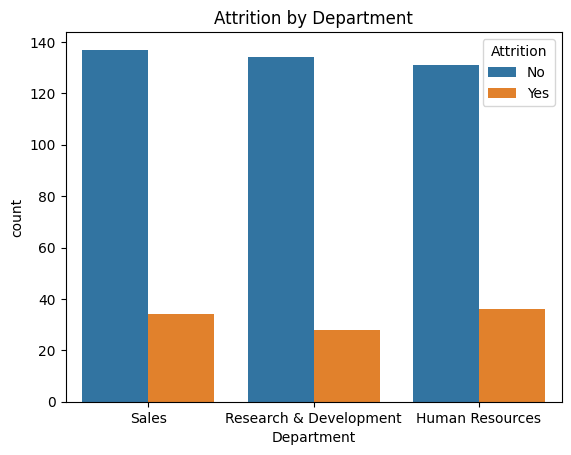

In [5]:
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition by Department")
plt.show()

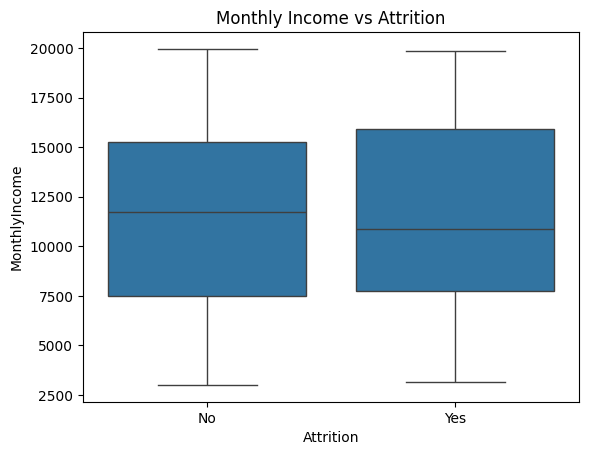

In [6]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

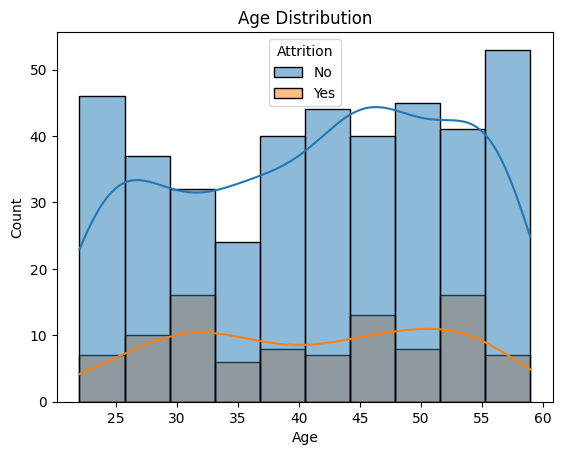

In [7]:
sns.histplot(data=df, x="Age", hue="Attrition", kde=True)
plt.title("Age Distribution")
plt.show()

In [8]:
le = LabelEncoder()
for column in ["Gender", "Department", "JobRole", "OverTime", "Attrition"]:
    df[column] = le.fit_transform(df[column])

In [9]:
X = df.drop(["Attrition", "EmployeeID"], axis=1)
y = df["Attrition"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


--- Logistic Regression Results ---
Accuracy: 0.76
Confusion Matrix:
 [[76  0]
 [24  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        76
           1       0.00      0.00      0.00        24

    accuracy                           0.76       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.58      0.76      0.66       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [14]:
print("\n--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


--- Decision Tree Results ---
Accuracy: 0.63
Confusion Matrix:
 [[59 17]
 [20  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        76
           1       0.19      0.17      0.18        24

    accuracy                           0.63       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.61      0.63      0.62       100



In [15]:
df.to_csv("Cleaned_HR_Attrition.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_HR_Attrition.csv'")


Cleaned dataset saved as 'Cleaned_HR_Attrition.csv'


In [16]:
# Install required packages
!pip install plotly ipywidgets

import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Load dataset
df = pd.read_csv("Synthetic_HR_Attrition_Dataset.csv")

# STEP 1: Preprocessing (encode target for plotting)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# STEP 2: Dropdown Widget to filter by JobRole
job_dropdown = widgets.Dropdown(
    options=df['JobRole'].unique(),
    description='Job Role:',
    value=df['JobRole'].unique()[0],
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# STEP 3: Define update function to refresh plots
def update_dashboard(jobrole):
    filtered = df[df['JobRole'] == jobrole]

    # Pie Chart - Attrition %
    pie = px.pie(filtered, names='Attrition', title=f'Attrition Distribution for {jobrole}',
                 labels={0: 'No', 1: 'Yes'})

    # Bar Chart - Department-wise Attrition
    bar = px.histogram(filtered, x='Department', color='Attrition',
                       barmode='group', title='Department vs Attrition',
                       labels={'Attrition': 'Attrition Status'})

    # Box Plot - Monthly Income
    box = px.box(filtered, x='Attrition', y='MonthlyIncome',
                 title='Monthly Income vs Attrition',
                 labels={'Attrition': 'Attrition (0=No, 1=Yes)'})

    pie.show()
    bar.show()
    box.show()

# STEP 4: Display dashboard with interactivity
widgets.interact(update_dashboard, jobrole=job_dropdown)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.8 MB/s eta 0:00:00


interactive(children=(Dropdown(description='Job Role:', layout=Layout(width='50%'), options=('Research Scienti…

<function __main__.update_dashboard(jobrole)>